<hr style="color:green" />
<h1 style="color:green">COSC2673 Assignment 2: Image Classification for Cancerous Cells</h1>
<h2 style="color:green">File 01: Data Exploration</h2>
<hr style="color:green" />

# 0. Import Libraries & Load Dataset

In [1]:
import tensorflow
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# import statistics_utility as statsutil
print(tensorflow.__version__)

2.10.0


In [2]:
# Load the datasets
locationMain = "data_labels_mainData.csv"
locationExtra = "data_labels_extraData.csv"
dfMain = pd.read_csv(locationMain)
dfExtra = pd.read_csv(locationExtra)

# 1. Exploratory Data Analysis

In [3]:
# Checks the number of rows and columns of the main and extra dataset
print("Number of rows:", dfMain.shape[0], "\t Number of columns:", dfMain.shape[1])
print("Number of rows:", dfExtra.shape[0], "\t Number of columns:", dfExtra.shape[1])

Number of rows: 9896 	 Number of columns: 6
Number of rows: 10384 	 Number of columns: 4


From the output above, it can be seen that some columns are missing in the extra dataset. Let's take a closer look.

In [4]:
# Check the first few data of the main dataset
dfMain.head()

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous
0,22405,1,22405.png,fibroblast,0,0
1,22406,1,22406.png,fibroblast,0,0
2,22407,1,22407.png,fibroblast,0,0
3,22408,1,22408.png,fibroblast,0,0
4,22409,1,22409.png,fibroblast,0,0


In [5]:
# Check the first few data of the extra dataset
dfExtra.head()

,InstanceID,patientID,ImageName,isCancerous
0,12681,61,12681.png,0
1,12682,61,12682.png,0
2,12683,61,12683.png,0
3,12684,61,12684.png,0
4,12685,61,12685.png,0


It can be seen that for the extra dataset, there are no labels relating to what cell types those image fall into

In [6]:
# Function to get unique values for each column of dataset
def df_get_uniques(df, dfName, dfNameHeader=True):  
    if dfNameHeader:
        print("Dataframe Name: " + dfName)   
    print("Dataframe Column Unique Values")
    print("--------------------")
    for col in df:
        print("Column '" + col + "' - Unique value count: " + str(len(df[col].unique())))
        if len(df[col].unique()) <= 20:
            print("   Column '" + col + "' values:")
            print("   " + str(df[col].unique()))

In [7]:
# Check information of the main dataset
dfMain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9896 entries, 0 to 9895
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   InstanceID    9896 non-null   int64 
 1   patientID     9896 non-null   int64 
 2   ImageName     9896 non-null   object
 3   cellTypeName  9896 non-null   object
 4   cellType      9896 non-null   int64 
 5   isCancerous   9896 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 464.0+ KB


In [8]:
# Check the data types for each column of main dataset
dfMain.dtypes

InstanceID       int64
patientID        int64
ImageName       object
cellTypeName    object
cellType         int64
isCancerous      int64
dtype: object

In [9]:
# Check information of the main dataset
dfMain.describe()

,InstanceID,patientID,cellType,isCancerous
count,9896.000000,9896.000000,9896.000000,9896.000000
mean,10193.880154,29.762025,1.501516,0.412187
std,6652.912660,17.486553,0.954867,0.492253
min,1.000000,1.000000,0.000000,0.000000
25%,4135.750000,14.000000,1.000000,0.000000
50%,9279.500000,26.000000,2.000000,0.000000
75%,16821.250000,47.000000,2.000000,1.000000
max,22444.000000,60.000000,3.000000,1.000000


In [10]:
df_get_uniques(dfMain, "dfMain")

Dataframe Name: dfMain
Dataframe Column Unique Values
--------------------
Column 'InstanceID' - Unique value count: 9896
Column 'patientID' - Unique value count: 60
Column 'ImageName' - Unique value count: 9896
Column 'cellTypeName' - Unique value count: 4
   Column 'cellTypeName' values:
   ['fibroblast' 'inflammatory' 'others' 'epithelial']
Column 'cellType' - Unique value count: 4
   Column 'cellType' values:
   [0 1 3 2]
Column 'isCancerous' - Unique value count: 2
   Column 'isCancerous' values:
   [0 1]


From above, it shows that there are no null values within the dataset, and as every image file name is unique, it is assumed that every data is unique. Moving on to the extra dataset

In [11]:
# Check information of the extra dataset
dfExtra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10384 entries, 0 to 10383
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   InstanceID   10384 non-null  int64 
 1   patientID    10384 non-null  int64 
 2   ImageName    10384 non-null  object
 3   isCancerous  10384 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 324.6+ KB


In [12]:
# Check the data types for each column of extra dataset
dfExtra.dtypes

InstanceID      int64
patientID       int64
ImageName      object
isCancerous     int64
dtype: object

In [13]:
# Check information of the extra dataset
dfExtra.describe()

,InstanceID,patientID,isCancerous
count,10384.000000,10384.00000,10384.000000
mean,12087.866333,80.38203,0.287943
std,6173.866838,9.40388,0.452826
min,1631.000000,61.00000,0.000000
25%,6655.750000,71.00000,0.000000
50%,12377.500000,81.00000,0.000000
75%,16374.250000,88.00000,1.000000
max,22235.000000,99.00000,1.000000


In [14]:
df_get_uniques(dfExtra, "dfExtra")

Dataframe Name: dfExtra
Dataframe Column Unique Values
--------------------
Column 'InstanceID' - Unique value count: 10384
Column 'patientID' - Unique value count: 38
Column 'ImageName' - Unique value count: 10384
Column 'isCancerous' - Unique value count: 2
   Column 'isCancerous' values:
   [0 1]


From above it shows that the extra dataset contains no null values and all images are unique as well.

It is interesting to see the number of records for each patient in the dataset

In [15]:
print("Average number of records for one patient: ", dfMain.groupby("patientID").size().mean())

Average number of records for one patient:  164.93333333333334


It can be seen that one patient could have an average of 165 records. From there, it is interesting to see if patients could have both non-cancerous and cancerous records

In [16]:
dfCancerousGrouped = dfMain.groupby(["patientID", "isCancerous"]).size()
dfCancerousGrouped.head()

patientID  isCancerous
1          0               19
2          0               33
3          0              136
4          0              127
5          0              134
dtype: int64

In [17]:
# Now look for any patient id that has more than one record
counts = dfCancerousGrouped.groupby("patientID").filter(lambda group: len(group) > 1).groupby("patientID").size().count()
print("Number of patinets with cancerous & non-canceours records: ", counts)

Number of patinets with cancerous & non-canceours records:  34


Patients have records for both cancerous and non-cancerous cells. Therefore, there is no need to split according to patient Id for Cancerous modelling, there won't be any data-leakage based on patient Id. Moving on to the cell types

In [18]:
dfCellTypeGrouped = dfMain.groupby(["patientID", "cellType"]).size()
dfCellTypeGrouped.head()

patientID  cellType
1          0           11
           1            6
           3            2
2          0            8
           1           18
dtype: int64

Already, without further querying, we can see that Patients can have multiple records for different cell types. Again, this means there is no need to split by patient id.

Now that some basic information of the table is acquired, some plots will be created to visualize the data within the dataset

In [19]:
# Function to plot bar plots
def bar_plot(series,title,labels=[]):
#   Get the axes of the plot
    ax = plt.axes()
    ax.set_xticks([x for x in range(0,series.nunique())])
    
#   Plot the count for different values
    series.value_counts().plot(kind='bar')
    
#   Set the title of the plot
    plt.title(title)
    
#   Label each bar with the total number / value
    ax.bar_label(ax.containers[0])

#   Manaully set the x ticks or use the provided
    if len(labels) > 0:
        ax.set_xticklabels(labels,rotation=0)
    else:
        ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
        
#   Provide the x and y label
    plt.ylabel("Number")
    plt.xlabel("Cell Status")

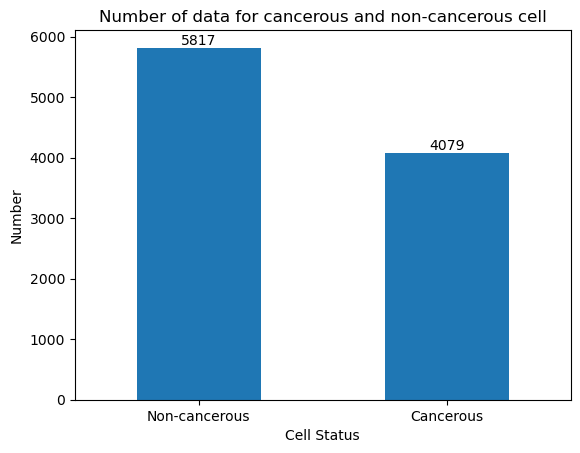

In [20]:
# Plot the number of data for different cancer class in main dataset
title = "Number of data for cancerous and non-cancerous cell"
labels = ['Non-cancerous','Cancerous']
bar_plot(dfMain['isCancerous'],title,labels)

The data in the main dataset seems fairly distributed across cancerous and non-cancerous labels!

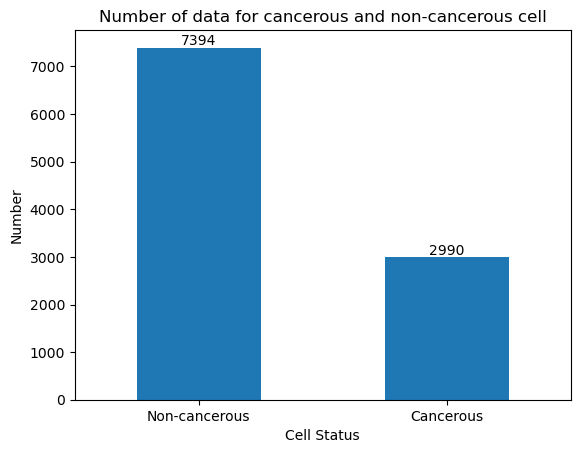

In [21]:
# Plot the number of data for different cancer class in extra dataset
title = "Number of data for cancerous and non-cancerous cell"
labels = ['Non-cancerous','Cancerous']
bar_plot(dfExtra['isCancerous'],title,labels)

The number of data within the extra dataset is imbalanced for cancerous & non-cancerous cells..

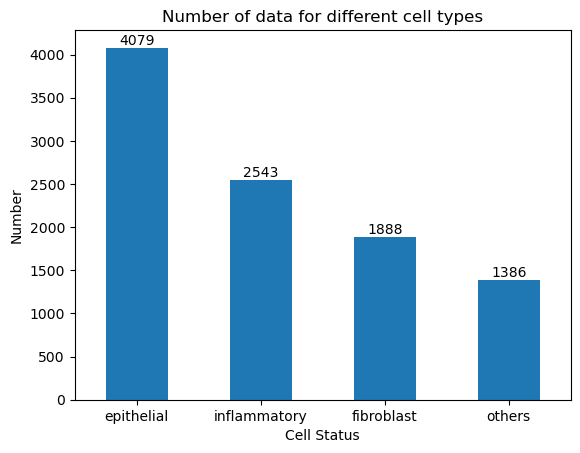

In [22]:
# Plot the number of data for different cell type for main dataset
title = "Number of data for different cell types"
bar_plot(dfMain['cellTypeName'],title)

There is not a lot of data for different cell types! Only 1,386 data for others! From there, it is interesting to see among these data, how many are cancerous and how many are not!

In [23]:
# Function to plot and annotate a grouped bar plot
def group_bar(crosstab,title,labels=[]):
#   Initialize subplots
    fig,ax = plt.subplots()
    
#   Plot the bar
    bars = crosstab.plot.bar(ax = ax)
    
#   Set the title of the plot
    plt.title(title)
    
#   Set the xticks manaully or use the default
    if len(labels) > 1:
        plt.xticks(crosstab.index,labels,rotation=0)
        
#   Annotate the bara if the value is > 0
    for bar in bars.containers:
        labels = [h if (h := a.get_height()) != 0 else '' for a in bar]
        ax.bar_label(bar,labels)
        
#   Provide the x and y label
    plt.ylabel("Number")
    plt.xlabel("Cell Status")

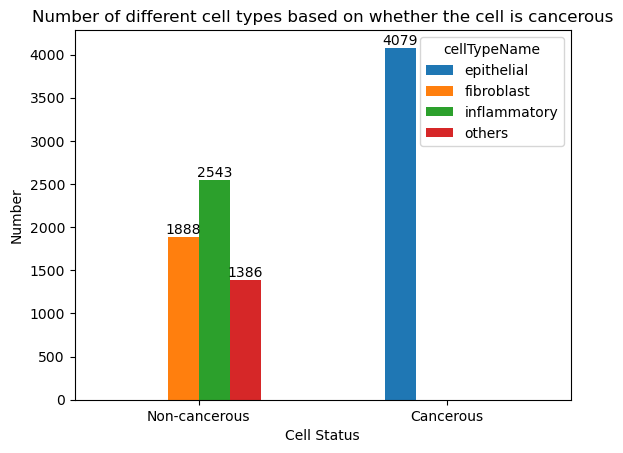

In [24]:
# Plot the number of cell types based on whehter it is cancerous or not
cancell = pd.crosstab(dfMain['isCancerous'],dfMain['cellTypeName'])
group_bar(cancell,
         "Number of different cell types based on whether the cell is cancerous",
          ['Non-cancerous','Cancerous'])

Data with cancerous cells only contain epithelial cell types and data with non-cancerous cells only contains 3 cell types! This could pose a big problem where the model will be trained on an incomplete dataset!

In [25]:
# Get the dataset according to cancerous and cell type
cancerous = dfMain[dfMain['isCancerous'] == 1]
benign = dfMain[dfMain['isCancerous'] == 0]
epithelial = dfMain[dfMain['cellTypeName'] == 'epithelial']
fibroblast = dfMain[dfMain['cellTypeName'] == 'fibroblast']
others = dfMain[dfMain['cellTypeName'] == 'others']
inflammatory = dfMain[dfMain['cellTypeName'] == 'inflammatory']

In [26]:
from math import ceil
# Function to show a set number of random images
def show_images(df,num):
#   Get random data from the dataset
    r_inx = np.random.choice(df.index, num)
    rand_data = df.loc[r_inx,'ImageName']
    
#   Set figure size
    plt.figure(figsize=(16,4))

#   Plot the images where every row has maximum 5 images
    for i, image_path in enumerate(rand_data):
        im = np.asarray(Image.open('patch_images/'+image_path))
        plt.subplot(ceil(num/5),5,i+1)
        plt.imshow(im,cmap='gray')
        plt.axis('off')

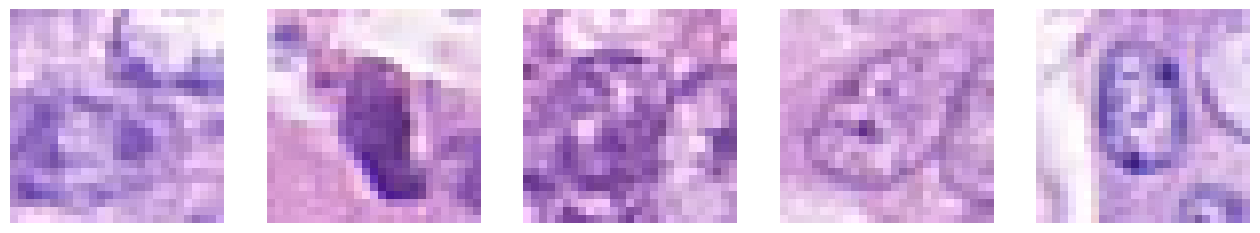

In [27]:
# Show 5 random images of cancerous cells
show_images(cancerous,5)

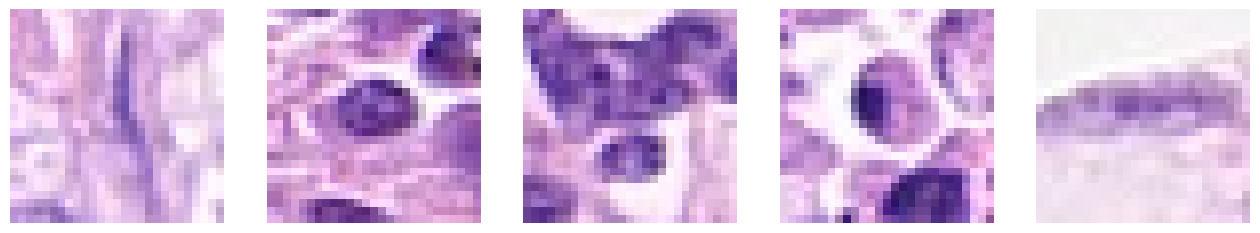

In [28]:
# Show 5 random images of non-cancerous cells
show_images(benign,5)

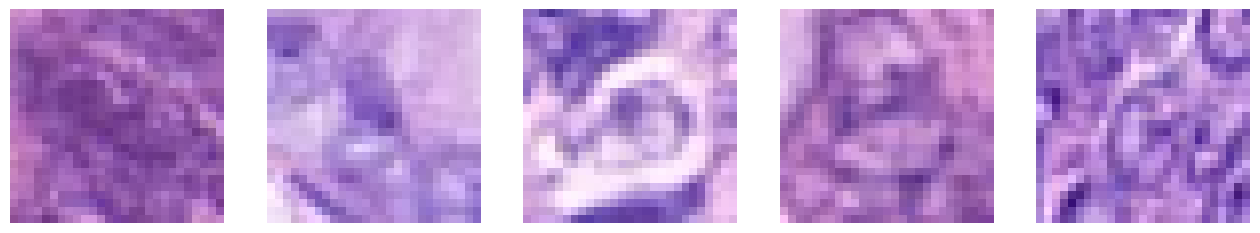

In [29]:
# Show 5 random images of epithelial cells
show_images(epithelial,5)

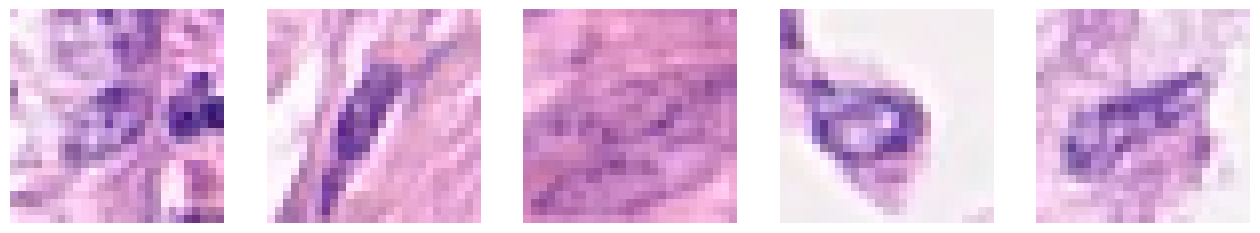

In [30]:
# Show 5 random images of fibroblast cell types
show_images(fibroblast,5)

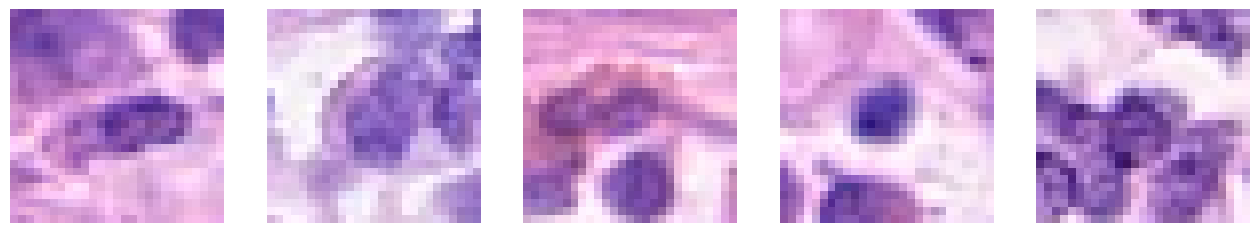

In [31]:
# Show 5 random images of inflammatory cells
show_images(inflammatory,5)

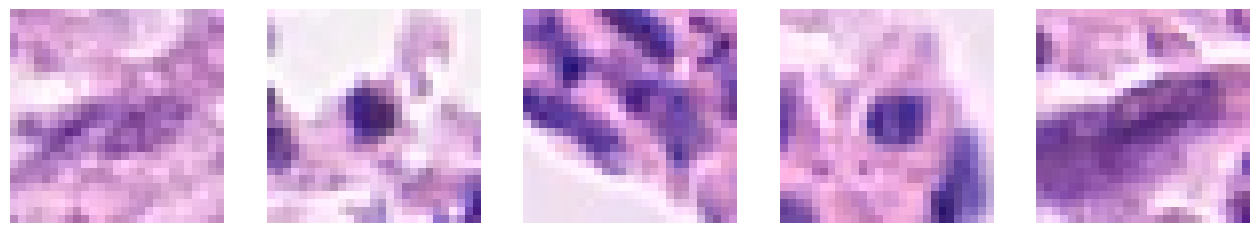

In [32]:
# Show 5 random images of other cell types
show_images(others,5)

## Combining Main Dataset & Extra Dataset
From the analysis above, it would be ideal to combine both datasets to train on the isCancerous class

In [33]:
# Concatnate both datasets to form a bigger dataset
dfMain_nocell = dfMain.loc[:, ~dfMain.columns.isin(['cellType','cellTypeName'])]
dfAll = pd.concat([dfMain_nocell, dfExtra])

In [34]:
dfAll

,InstanceID,patientID,ImageName,isCancerous
0,22405,1,22405.png,0
1,22406,1,22406.png,0
2,22407,1,22407.png,0
3,22408,1,22408.png,0
4,22409,1,22409.png,0
...,...,...,...,...
10379,20028,99,20028.png,0
10380,20029,99,20029.png,0
10381,20030,99,20030.png,0
10382,20031,99,20031.png,0


In [35]:
print("Number of rows:", dfAll.shape[0], "\t Number of columns:", dfAll.shape[1])

Number of rows: 20280 	 Number of columns: 4


In [36]:
dfAll.head()

,InstanceID,patientID,ImageName,isCancerous
0,22405,1,22405.png,0
1,22406,1,22406.png,0
2,22407,1,22407.png,0
3,22408,1,22408.png,0
4,22409,1,22409.png,0


In [37]:
# Print information of a dataset
dfAll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20280 entries, 0 to 10383
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   InstanceID   20280 non-null  int64 
 1   patientID    20280 non-null  int64 
 2   ImageName    20280 non-null  object
 3   isCancerous  20280 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 792.2+ KB


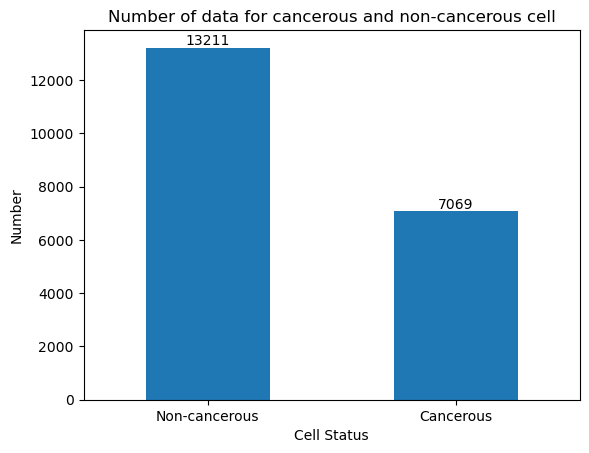

In [38]:
# Plot the number of data for different cancer class in combined dataset
title = "Number of data for cancerous and non-cancerous cell"
labels = ['Non-cancerous','Cancerous']
bar_plot(dfAll['isCancerous'],title,labels)

Although the dataset is still imbalanced, the model could be trained on more data.